## Lightgbm
- 교재와 버전 맞추기 : 3.3.2

In [3]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0


In [1]:
import lightgbm
lightgbm.__version__

'4.0.0'

## 한글 폰트 적용

## 구글 드라이브 연동

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 결정 트리

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=156)

In [8]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

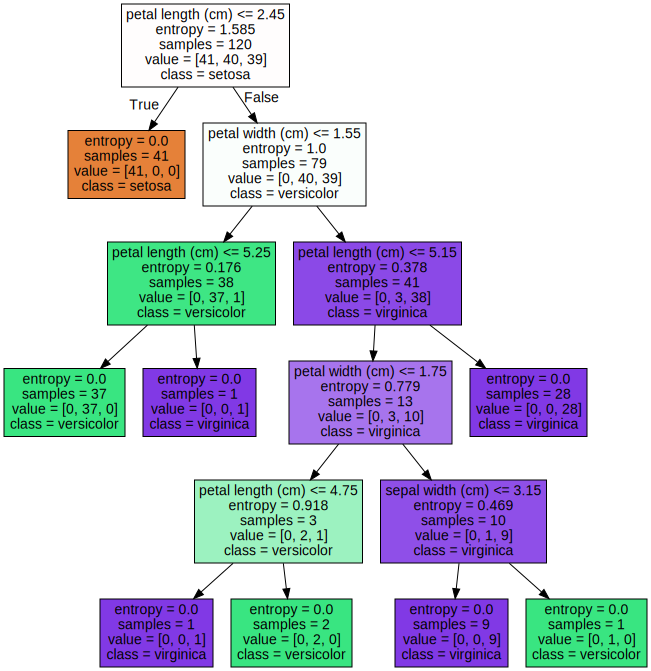

In [9]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 196~7 p
    - 몇 개의 피처가 명확한 결정 트리를 만드는지 확인

Feature importance:
[0.    0.025 0.662 0.313]
sepal length (cm) 0.0
sepal width (cm) 0.024663283654805638
petal length (cm) 0.6623225082642857
petal width (cm) 0.31301420808090863


<Axes: >

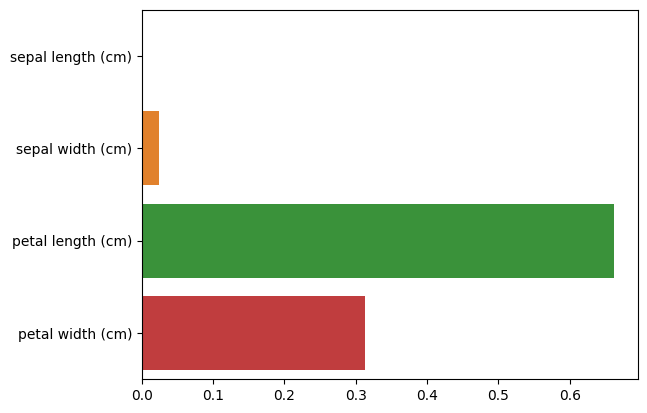

In [13]:
# 197p

import seaborn as sns
import numpy as np

# feature_importance_ 추출
print("Feature importance:\n{0}" .format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, value)

sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

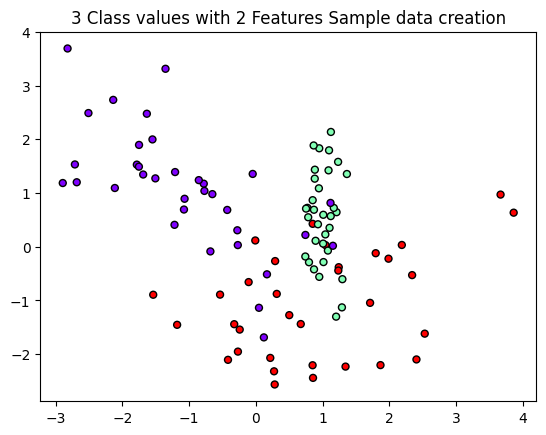

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [15]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

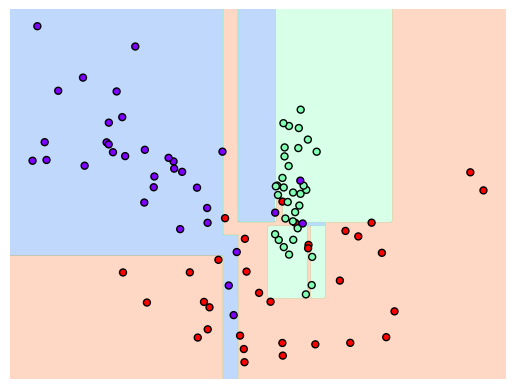

In [16]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

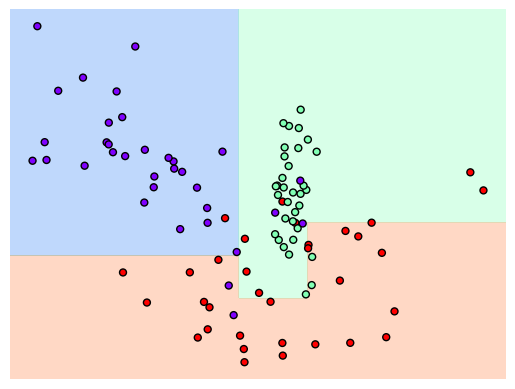

In [17]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [4]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/멀티캠퍼스/data'

feature_name_df = pd.read_csv(DATA_PATH + '/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

feature_name_df.head(1)

,column_index,column_name
0,1,tBodyAcc-mean()-X


In [5]:
# 피처명 index 제거, 리스트 객체로 생성한 뒤 10개 추출

feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [12]:
# 중복된 피처명 확인

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())

feature_dup_df[feature_dup_df['column_index'] > 1].tail()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyGyro-bandsEnergy()-41,48",3
"fBodyGyro-bandsEnergy()-49,56",3
"fBodyGyro-bandsEnergy()-49,64",3
"fBodyGyro-bandsEnergy()-57,64",3
"fBodyGyro-bandsEnergy()-9,16",3


## 데이터 수집 함수
- 주의 : 42개의 피처명이 중복되어 있음
- 해결 : 원본 피처명에 _1, _2를 추가하여 새로운 형태의 DataFrame 만들기

In [13]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()

    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')

    # 중복 feature 명에 대해 원본 feature_1, _2 추가
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

function_test = get_new_feature_name_df(feature_name_df)
function_test.sample(5)

,column_index,column_name,dup_cnt
61,62,tGravityAcc-iqr()-Z,0
204,205,tBodyAccMag-min(),0
402,403,"fBodyAccJerk-bandsEnergy()-57,64_1",1
522,523,fBodyBodyAccJerkMag-iqr(),0
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1


In [14]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    DATA_PATH = '/content/drive/MyDrive/멀티캠퍼스/data'
    feature_name_df = pd.read_csv(DATA_PATH + '/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(DATA_PATH + '/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv(DATA_PATH + '/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(DATA_PATH + '/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(DATA_PATH + '/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [17]:
# 205 p
# 레이블 값이 6개, 비교적 고르게 분포해 있음

y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


### 모형 학습
- 그리드 서치

In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 16, 24],
    'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 16, 24], 'min_samples_split': [16]},
             scoring='accuracy', verbose=1)

In [20]:
print('정확도 수치', grid_cv.best_score_)
print('최적 파라미터', grid_cv.best_params_)

정확도 수치 0.8486240560126157
최적 파라미터 {'max_depth': 24, 'min_samples_split': 16}


In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.345546,0.337076,0.010879,0.002593,6,16,"{'max_depth': 6, 'min_samples_split': 16}",0.813732,0.868117,0.819728,0.866667,0.870068,0.847662,0.025350,2
1,4.351140,0.652741,0.011821,0.003653,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.800816,0.815092,0.858503,0.876871,0.884354,0.847127,0.033379,3
2,4.169440,0.347711,0.010746,0.002448,24,16,"{'max_depth': 24, 'min_samples_split': 16}",0.798097,0.815092,0.858503,0.876871,0.894558,0.848624,0.036559,1


In [24]:
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,16,0.847127
2,24,0.848624


In [26]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f"결정트리 예측 정확도:{round(accuracy, 4)}")

결정트리 예측 정확도:0.8565


### 피처별 중요도 시각화

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


ftr_importances_values = best_df_clf.feature_importances_
type(ftr_importances_values)


numpy.ndarray

In [30]:
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_importances

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.000000
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001242
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000952
angle(Y,gravityMean)                    0.133692
angle(Z,gravityMean)                    0.002873
Length: 561, dtype: float64

In [33]:
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
ftr_top20

tGravityAcc-min()-X                0.243678
fBodyAccJerk-bandsEnergy()-1,16    0.204465
angle(Y,gravityMean)               0.133692
fBodyAccMag-energy()               0.111068
tGravityAcc-arCoeff()-Z,2          0.097995
fBodyGyro-maxInds-X                0.023055
tGravityAcc-energy()-Y             0.019688
tBodyGyro-correlation()-Y,Z        0.015883
tBodyAccMag-arCoeff()1             0.015140
tBodyGyro-max()-X                  0.008799
fBodyAcc-max()-Y                   0.008488
tBodyAcc-correlation()-X,Y         0.007111
tGravityAcc-max()-Y                0.006378
fBodyGyro-max()-X                  0.005714
tBodyGyro-min()-X                  0.005265
tGravityAcc-arCoeff()-X,3          0.004570
tGravityAcc-min()-Y                0.003839
tBodyAccJerk-correlation()-X,Y     0.003815
tBodyGyroJerk-max()-X              0.003339
tGravityAcc-arCoeff()-Y,3          0.002909
dtype: float64

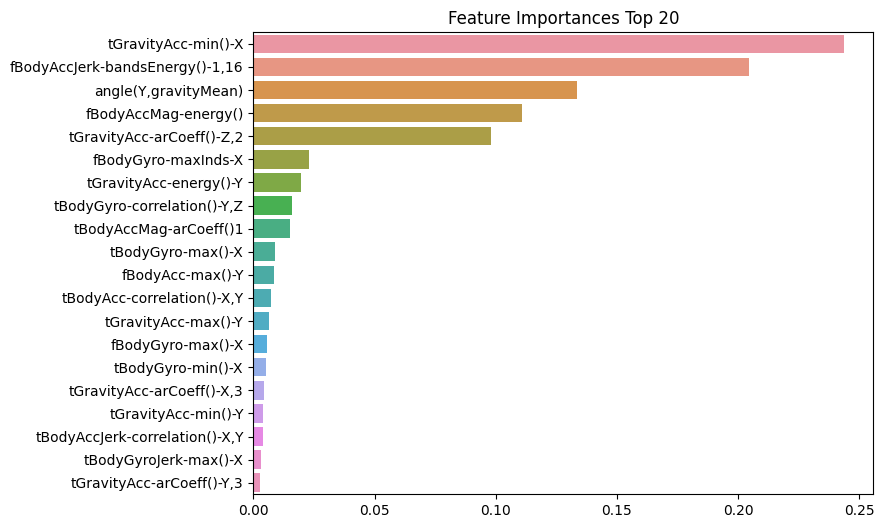

In [36]:
plt.figure(figsize = (8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()